### 1.Import

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

1.1 Models

In [83]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Naive Bayes': GaussianNB(),
    # 'KNN': KNeighborsClassifier(),
    # 'Decision Tree': DecisionTreeClassifier(random_state=42),
    # 'Random Forest': RandomForestClassifier(random_state=42),
    # 'SVM': SVC(random_state=42)
}

### 2.Load dataset

In [84]:
path=r"C:\Users\mrtat\Downloads\NTI\Data\online_shoppers_intention.csv"

In [85]:
df = pd.read_csv(path)

2.1.Show Data

In [86]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [87]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [88]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### 3.Preprocessing

3.1Handle missing values

In [90]:
df.isna().sum().sort_values(ascending=False)

Administrative             0
Administrative_Duration    0
Weekend                    0
VisitorType                0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
PageValues                 0
ExitRates                  0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Revenue                    0
dtype: int64

3.2 Handle duplicated

In [91]:
df.duplicated().sum()

125

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
df.drop(['Month','OperatingSystems','Browser'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True) # Reset index after dropping columns and removing duplicates

In [94]:
df.shape

(12205, 15)

3.3 Label Encode to all data

In [95]:
lb=LabelEncoder()
for col in df.columns:
    df[col] = lb.fit_transform(df[col])

4.1 Data before balance

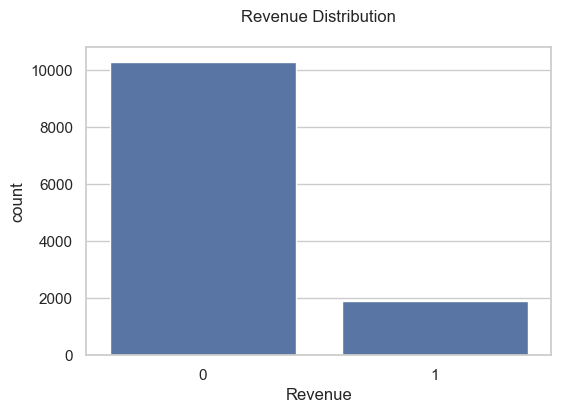

In [96]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title('Revenue Distribution\n')
plt.show()

In [97]:
print(df['Revenue'].value_counts())
print(df['Revenue'].value_counts(normalize=True))  # Shows percentages

Revenue
0    10297
1     1908
Name: count, dtype: int64
Revenue
0    0.843671
1    0.156329
Name: proportion, dtype: float64


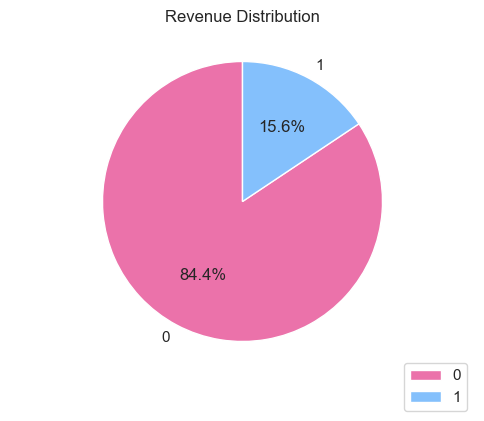

In [98]:
revenue_counts = df['Revenue'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('Revenue Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

3.3 Split data

In [99]:
x = df.drop(['Revenue'], axis=1)
y = df['Revenue']

In [100]:
x_train1, x_test1, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [101]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test1)

In [102]:


smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

df = pd.DataFrame(x_train, columns=x.columns)
df['Revenue'] = y_train



### 4.Visulization

4.2 Data after balance

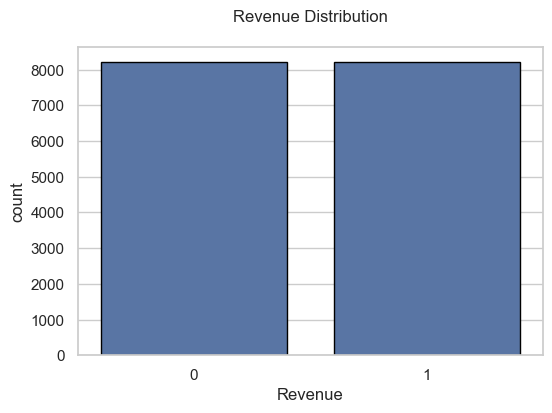

In [103]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', edgecolor='black', data=df)
plt.title('Revenue Distribution\n')
plt.show()

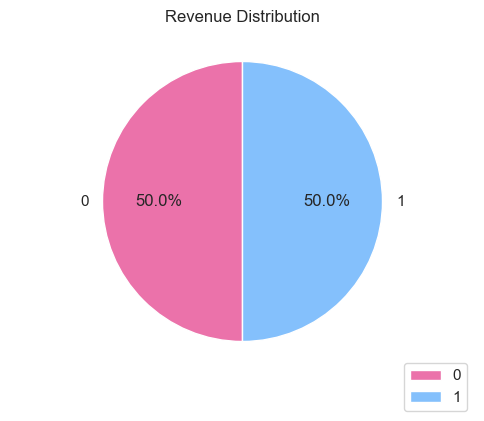

In [104]:
revenue_counts = df['Revenue'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('Revenue Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

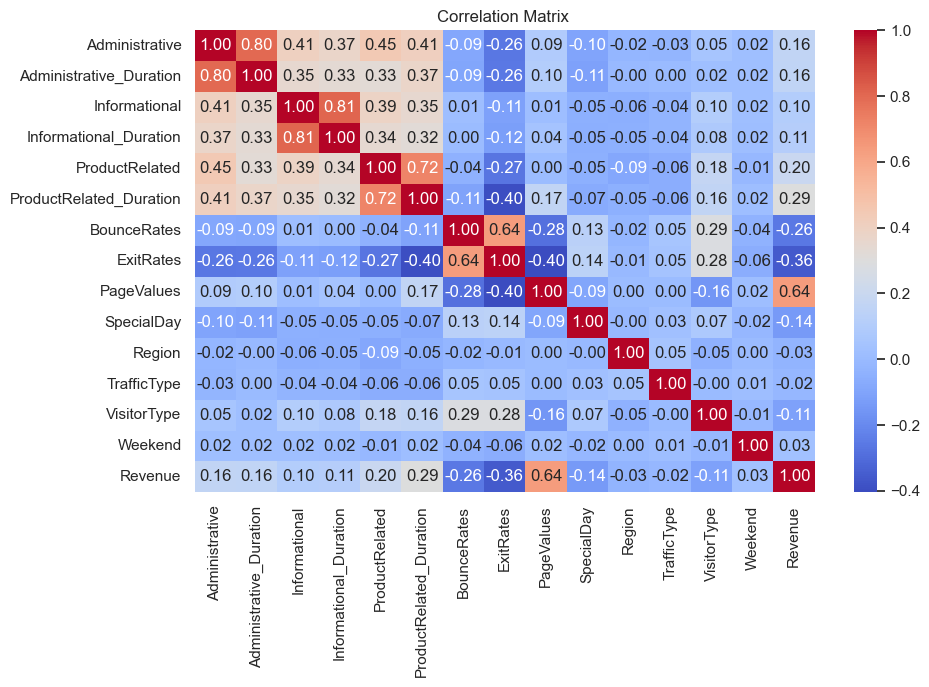

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix ')
plt.xticks(rotation=90)
plt.show()

### 5.Train model

In [106]:
results = {}
# models from 1.1 part
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

In [107]:
metrics_df = pd.DataFrame(results).T
metrics_df.index.name = 'Model'
print("\nPerformance Metrics:\n", metrics_df)


Performance Metrics:
                      Accuracy  Precision    Recall  F1-Score
Model                                                       
Logistic Regression  0.873413   0.555556  0.732044  0.631704


In [108]:
best_model_name = metrics_df['F1-Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model based on F1-Score: {best_model_name}\n")


Best Model based on F1-Score: Logistic Regression



### confusion Matrix & Classification Report for Best Model

In [109]:
y_pred_best = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_best)

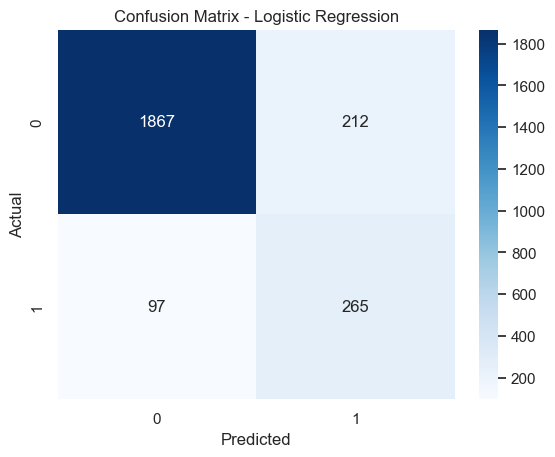

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2079
           1       0.56      0.73      0.63       362

    accuracy                           0.87      2441
   macro avg       0.75      0.82      0.78      2441
weighted avg       0.89      0.87      0.88      2441



In [110]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_best))